In [35]:
import pandas as pd

In [36]:
#creating dataframe
df={'Name':[None,'toyota','ford','maruti','kia','hyundai'],
   'year':['1986','1954',None,'1964','1942','1971'],
   'price':[5000,6000,8000,10000,None,7000]}
df=pd.DataFrame(df)
df.head()

,Name,year,price
0,None,1986,5000.0
1,toyota,1954,6000.0
2,ford,None,8000.0
3,maruti,1964,10000.0
4,kia,1942,NaN


In [37]:
#remove rows with missing value
df_r=df.dropna()
df_r

,Name,year,price
1,toyota,1954,6000.0
3,maruti,1964,10000.0
5,hyundai,1971,7000.0


In [38]:
#forward fill missing value
df_fill=df.fillna(method='ffill')
df_fill

,Name,year,price
0,None,1986,5000.0
1,toyota,1954,6000.0
2,ford,1954,8000.0
3,maruti,1964,10000.0
4,kia,1942,10000.0
5,hyundai,1971,7000.0


In [39]:
df_bfil=df.fillna(method='bfill')
df_bfil

,Name,year,price
0,toyota,1986,5000.0
1,toyota,1954,6000.0
2,ford,1964,8000.0
3,maruti,1964,10000.0
4,kia,1942,7000.0
5,hyundai,1971,7000.0


In [40]:
#handle duplicate values
df_dup=df_bfil.drop_duplicates()
df_dup

,Name,year,price
0,toyota,1986,5000.0
1,toyota,1954,6000.0
2,ford,1964,8000.0
3,maruti,1964,10000.0
4,kia,1942,7000.0
5,hyundai,1971,7000.0


In [41]:
# simple linear regression

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

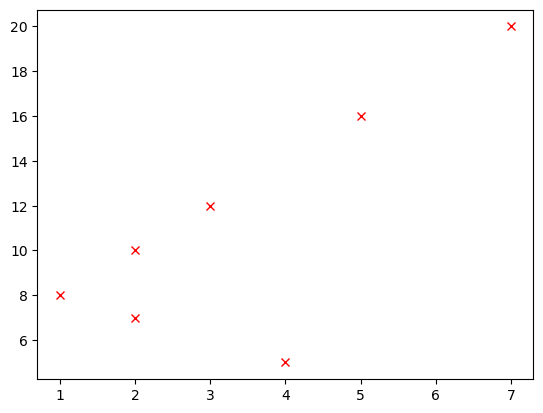

In [42]:
x=np.array([2,4,3,1,5,7,2]).reshape((-1,1))
y=np.array([7,5,12,8,16,20,10])
plt.plot(x,y,'x',color='red')
plt.show

slope of line: [1.96666667]
intercept: [4.4]


<function matplotlib.pyplot.show(close=None, block=None)>

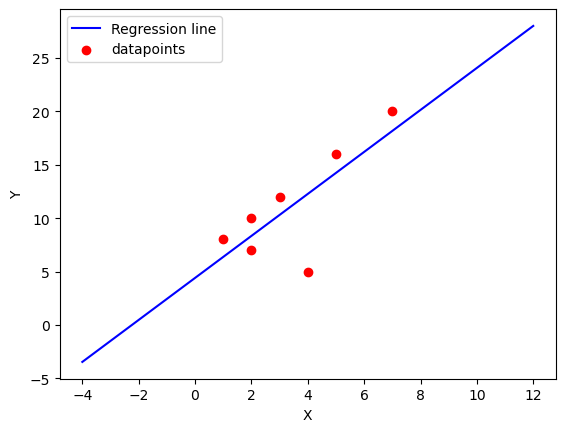

In [44]:
mean_x=np.mean(x)
mean_y=np.mean(y)

#no.of datapoints
m=len(x)

#using formula to calculate bo and b1
num=0
den=0
for i in range(m):
    num+=(x[i]-mean_x)*(y[i]-mean_y)
    den+=(x[i]-mean_x)**2
b1=num/den
print('slope of line:',b1)
b0=mean_y-(b1*mean_x)
print('intercept:',b0)

#plot regression line

max_x=np.max(x)+5
min_x=np.min(x)-5

#calculate line value x and y

X=np.linspace(min_x,max_x,100)
Y=b0+b1*X

#plot line

plt.plot(X,Y,color='blue',label='Regression line')
#scatter plot
plt.scatter(x,y,color='red',label='datapoints')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show

In [45]:
#calculate RMSE
mse=0
for i in range(m):
    y_pred=b0+b1*x[i]
    mse+=(y[i]-y_pred)**2
rmse=np.sqrt(np.sum(mse)/m)
print('RMSE:',rmse)

RMSE: 3.148695875165735


In [46]:
rss=0
tss=0
for i in range(m):
    y_pred=b0+b1*x[i]
    rss+=(y[i]-y_pred)**2
    tss+=(y[i]-mean_y)**2
r2=1-(np.sum(rss)/np.sum(tss))
print('r2score:',r2)

r2score: 0.5890016920473774


In [12]:
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn

x=x.reshape((m,1))
#creating model

l=LinearRegression()

#fitting data

fit=l.fit(x,y)

y_pred=fit.predict(x)

mse=mean_squared_error(y,y_pred)
print('MSE:',mse)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2_score=fit.score(x,y)
print('r2score:',r2_score)

MSE: 9.914285714285711
RMSE: 3.1486958751657346
r2score: 0.5890016920473775


In [13]:
from sklearn import datasets

In [14]:
wine=datasets.load_wine()
x=wine.data
y=wine.target

In [15]:
col=wine.feature_names

In [16]:
df=pd.DataFrame(x,columns=col)

In [17]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
df1=df.copy()

In [19]:
df1['alcohol']=(df1['alcohol']-df1['alcohol'].mean())/df1['alcohol'].std()

In [20]:
df1['alcohol']

0      1.514341
1      0.245597
2      0.196325
3      1.686791
4      0.294868
         ...   
173    0.873810
174    0.491955
175    0.331822
176    0.208643
177    1.391162
Name: alcohol, Length: 178, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
S=StandardScaler()

In [23]:
df2=S.fit_transform(df)

In [24]:
df2=pd.DataFrame(df2,columns=col)

In [25]:
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [26]:
df.shape

(178, 13)

In [27]:
q1=np.percentile(df,25)
q3=np.percentile(df,75)
iqr=q3-q1
print('IQR:',iqr)

IQR: 12.045


In [28]:
median=np.median(df)
print('Median:',median)

Median: 2.685


In [29]:
rob=(df-median)/iqr
rob=pd.DataFrame(rob,columns=col)

In [30]:
rob

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.958489,-0.080946,-0.021171,1.072229,10.320880,0.009548,0.031133,-0.199668,-0.032794,0.245330,-0.136571,0.102532,88.195517
1,0.872976,-0.075135,-0.045247,0.706932,8.079286,-0.002906,0.006227,-0.201328,-0.116646,0.140722,-0.135741,0.059361,86.950187
2,0.869655,-0.026982,-0.001245,1.321295,8.162308,0.009548,0.046077,-0.198007,0.010378,0.248651,-0.137401,0.040266,98.158157
3,0.970112,-0.061021,-0.015359,1.171856,9.158572,0.096721,0.066833,-0.202989,-0.041926,0.424658,-0.151515,0.063512,122.649647
4,0.876297,-0.007887,0.015359,1.520548,9.573682,0.009548,0.000415,-0.190535,-0.071814,0.135741,-0.136571,0.020340,60.798257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.915318,0.246160,-0.019510,1.479037,7.664176,-0.083437,-0.172271,-0.179743,-0.134911,0.416355,-0.169780,-0.078456,61.213367
174,0.889581,0.101702,-0.017020,1.686592,8.245330,-0.073474,-0.160648,-0.187215,-0.105853,0.383147,-0.164799,-0.093400,62.043587
175,0.878788,0.132420,-0.035284,1.437526,9.739726,-0.090909,-0.165629,-0.187215,-0.110834,0.623910,-0.173931,-0.093400,69.100457
176,0.870486,-0.007887,-0.026152,1.437526,9.739726,-0.085928,-0.166459,-0.178912,-0.101702,0.549191,-0.173101,-0.088418,69.515567
